In [18]:
%run Data_Loading_Cleaning.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      500 non-null    int64 
 1   Gender                   500 non-null    object
 2   COVID_Severity           500 non-null    object
 3   Hospitalized             500 non-null    object
 4   Days_to_Recovery         500 non-null    int64 
 5   Fatigue_Level            500 non-null    int64 
 6   Breathing_Issue          500 non-null    object
 7   Brain_Fog                500 non-null    object
 8   Loss_of_Taste_Smell      500 non-null    object
 9   Physical_Activity_Level  500 non-null    object
 10  Mental_Health_Impact     500 non-null    int64 
 11  Long_COVID_Risk          500 non-null    object
dtypes: int64(4), object(8)
memory usage: 47.0+ KB


In [19]:
label_cols=['Gender',
            'COVID_Severity',
            'Hospitalized',
            'Physical_Activity_Level',
            'Long_COVID_Risk'
           ]
le = LabelEncoder()
for col in label_cols:
    df[col]= le.fit_transform(df[col])

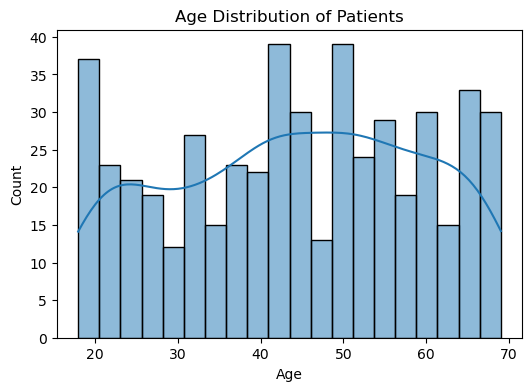

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.show()

In [21]:
severity_recovery = df.groupby('COVID_Severity')['Days_to_Recovery'].mean()
severity_recovery

COVID_Severity
0     94.101351
1    102.234177
2     96.130435
Name: Days_to_Recovery, dtype: float64

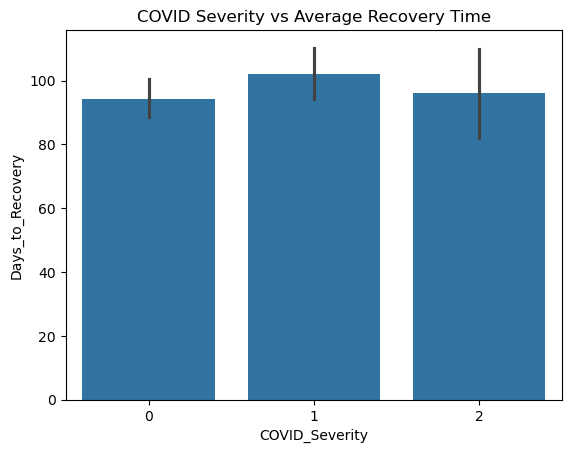

In [22]:
sns.barplot(x='COVID_Severity', y='Days_to_Recovery', data=df)
plt.title("COVID Severity vs Average Recovery Time")
plt.show()

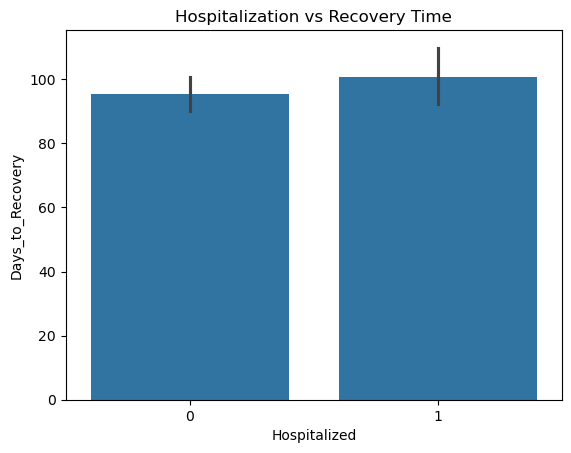

In [23]:
sns.barplot(x='Hospitalized', y='Days_to_Recovery', data=df)
plt.title("Hospitalization vs Recovery Time")
plt.show()

In [24]:
symptoms = ['Fatigue_Level', 'Breathing_Issue', 'Brain_Fog', 'Loss_of_Taste_Smell']
df[symptoms] = (
    df[symptoms]
    .replace({'Yes': 1, 'No': 0})
    .infer_objects(copy=False)
)

risk_symptom_mean = df.groupby('Long_COVID_Risk')[symptoms].mean()

risk_symptom_mean

,Fatigue_Level,Breathing_Issue,Brain_Fog,Loss_of_Taste_Smell
Long_COVID_Risk,,,,
0,3.279412,0.294118,0.308824,0.397059
1,3.076046,0.292776,0.254753,0.460076
2,2.958580,0.355030,0.213018,0.378698


In [25]:
df.groupby('Long_COVID_Risk')['Mental_Health_Impact'].mean()

Long_COVID_Risk
0    3.102941
1    2.828897
2    2.816568
Name: Mental_Health_Impact, dtype: float64

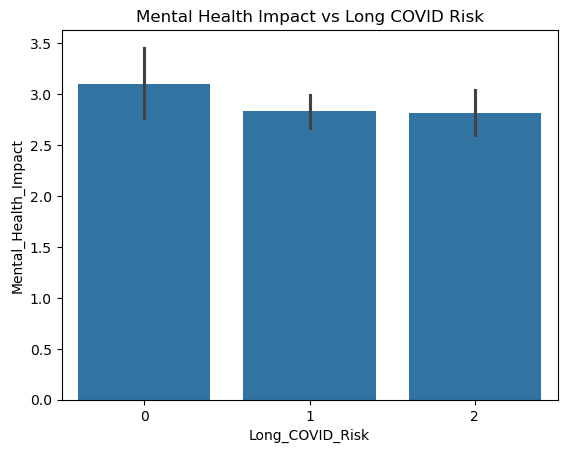

In [26]:
sns.barplot(x='Long_COVID_Risk', y='Mental_Health_Impact', data=df)
plt.title("Mental Health Impact vs Long COVID Risk")
plt.show()

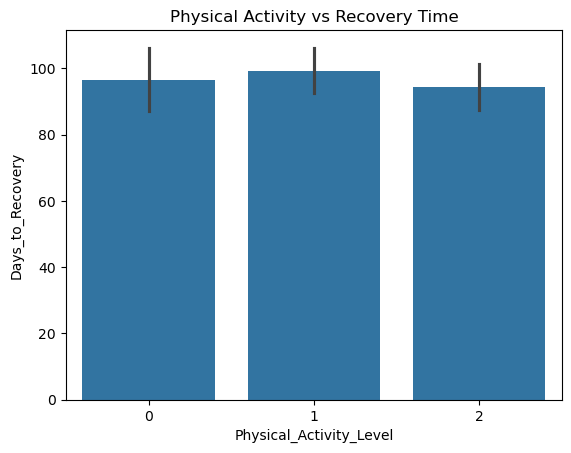

In [27]:
sns.barplot(x='Physical_Activity_Level', y='Days_to_Recovery', data=df)
plt.title("Physical Activity vs Recovery Time")
plt.show()

In [28]:
df['Symptom_Burden'] = df[
    ['Fatigue_Level', 'Breathing_Issue', 'Brain_Fog', 'Loss_of_Taste_Smell']
].sum(axis=1)

df[['Symptom_Burden', 'Long_COVID_Risk']].corr()

,Symptom_Burden,Long_COVID_Risk
Symptom_Burden,1.00000,-0.07607
Long_COVID_Risk,-0.07607,1.00000


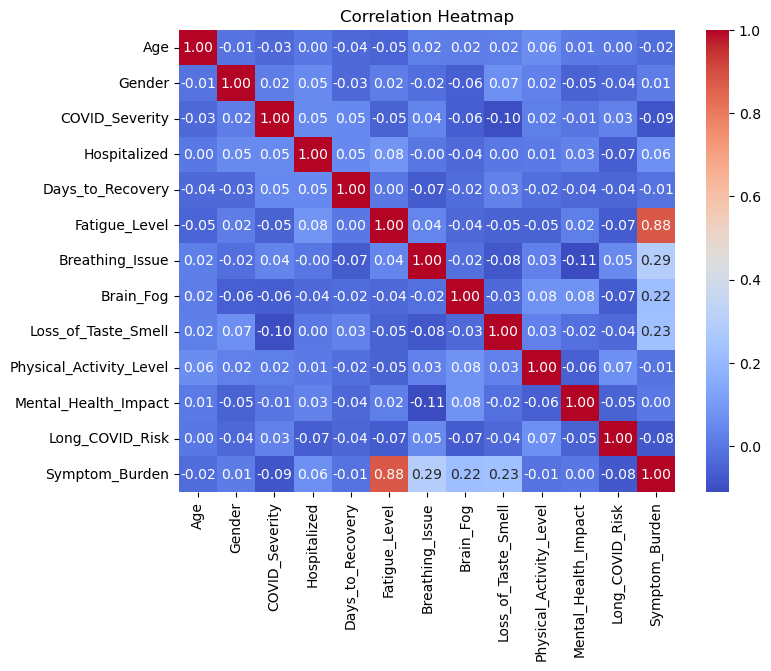

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()